**LOGISTIC REGRESSION**

1. Data Exploration:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the two CSV files
df1 = pd.read_csv('Titanic_test.csv')
df2 = pd.read_csv('Titanic_train.csv')

In [3]:
# Combine the dataframes
combined_df = pd.concat([df1, df2], ignore_index=True)

In [4]:
# Save the combined dataframe to a new CSV file
combined_df.to_csv('combined_file.csv', index=False)

**1. Data Exploration:**

In [5]:
# --- a. EDA: Basic overview ---
print("Dataset Info:\n")
print(combined_df.info())

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Survived     891 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB
None


In [6]:
print("\nFirst 5 Rows:\n")
print(combined_df.head())


First 5 Rows:

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q       NaN  
1  47.0      1      0   363272   7.0000   NaN        S       NaN  
2  62.0      0      0   240276   9.6875   NaN        Q       NaN  
3  27.0      0      0   315154   8.6625   NaN        S       NaN  
4  22.0      1      1  3101298  12.2875   NaN        S       NaN  


In [7]:
print("\nSummary Statistics:\n")
print(combined_df.describe(include='all'))


Summary Statistics:

        PassengerId       Pclass              Name   Sex          Age  \
count   1309.000000  1309.000000              1309  1309  1046.000000   
unique          NaN          NaN              1307     2          NaN   
top             NaN          NaN  Kelly, Mr. James  male          NaN   
freq            NaN          NaN                 2   843          NaN   
mean     655.000000     2.294882               NaN   NaN    29.881138   
std      378.020061     0.837836               NaN   NaN    14.413493   
min        1.000000     1.000000               NaN   NaN     0.170000   
25%      328.000000     2.000000               NaN   NaN    21.000000   
50%      655.000000     3.000000               NaN   NaN    28.000000   
75%      982.000000     3.000000               NaN   NaN    39.000000   
max     1309.000000     3.000000               NaN   NaN    80.000000   

              SibSp        Parch    Ticket         Fare        Cabin Embarked  \
count   1309.000000 

In [8]:
# --- b. Feature types and missing values ---
print("\nMissing Values:\n")
print(combined_df.isnull().sum())


Missing Values:

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Survived        418
dtype: int64


In [9]:
print("\nData Types:\n")
print(combined_df.dtypes)


Data Types:

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived       float64
dtype: object


In [10]:
# --- c. Visualizations ---

# Set visual style
sns.set(style="whitegrid")

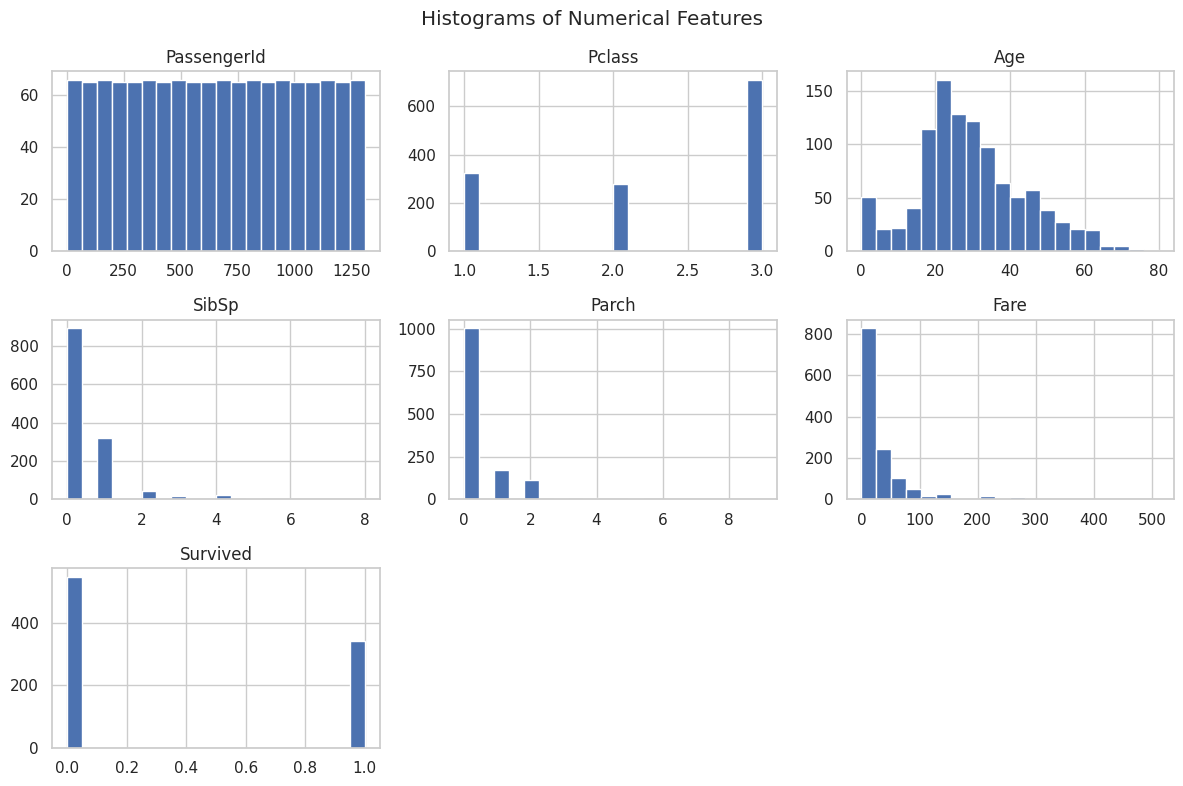

In [11]:
# Histogram of numerical features
combined_df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

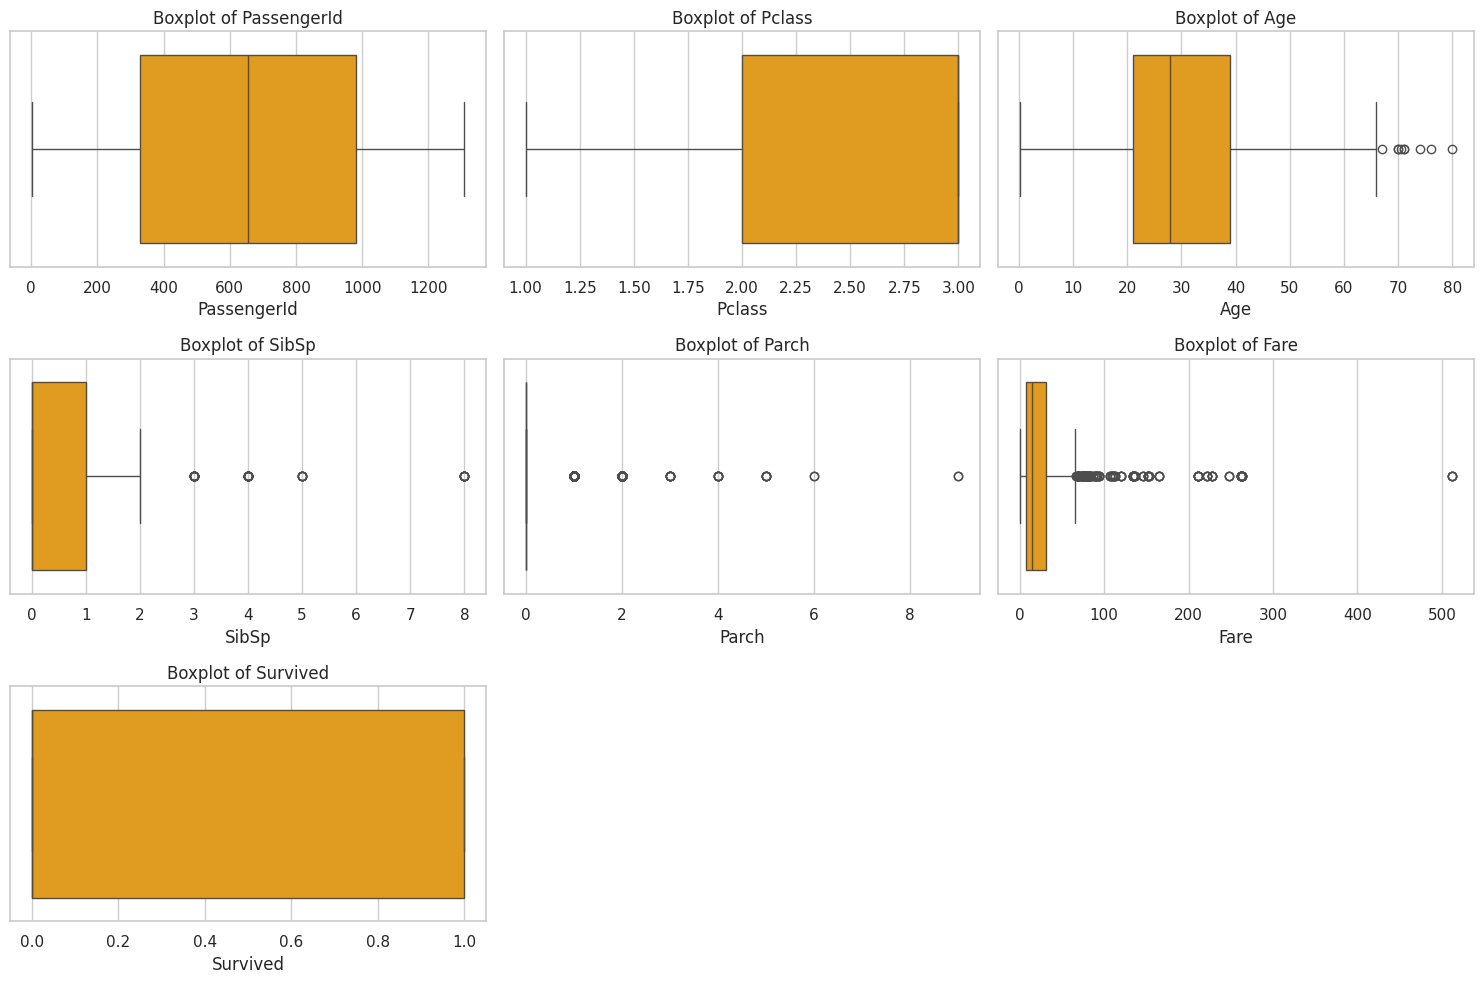

In [12]:
# Boxplots for numeric features
numeric_cols = combined_df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=combined_df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

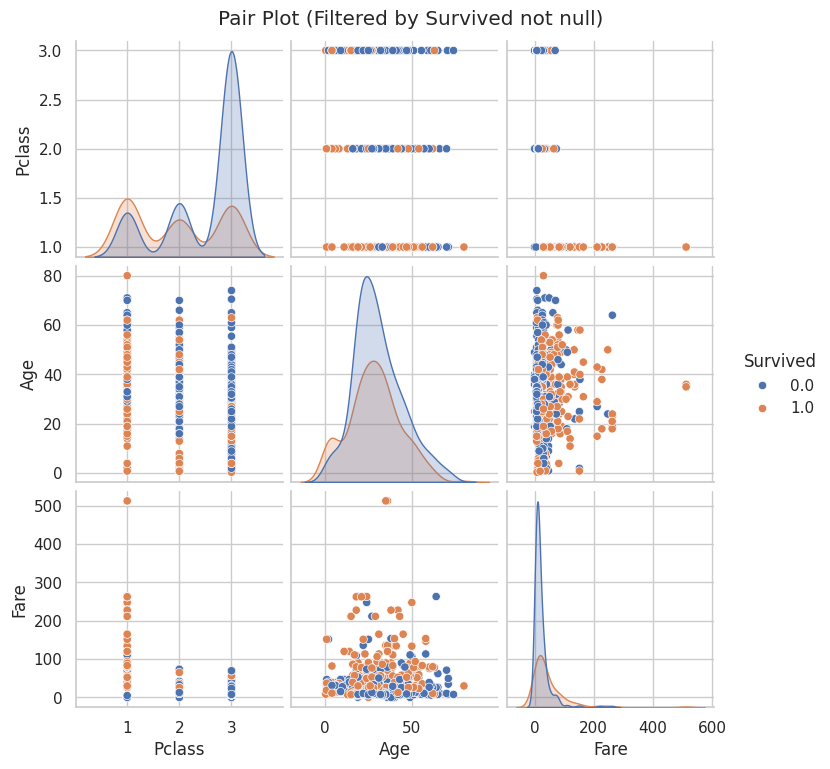

In [13]:
# Pair plot (only non-null 'Survived' rows)
sns.pairplot(combined_df[combined_df['Survived'].notnull()][['Pclass', 'Age', 'Fare', 'Survived']], hue='Survived')
plt.suptitle("Pair Plot (Filtered by Survived not null)", y=1.02)
plt.show()

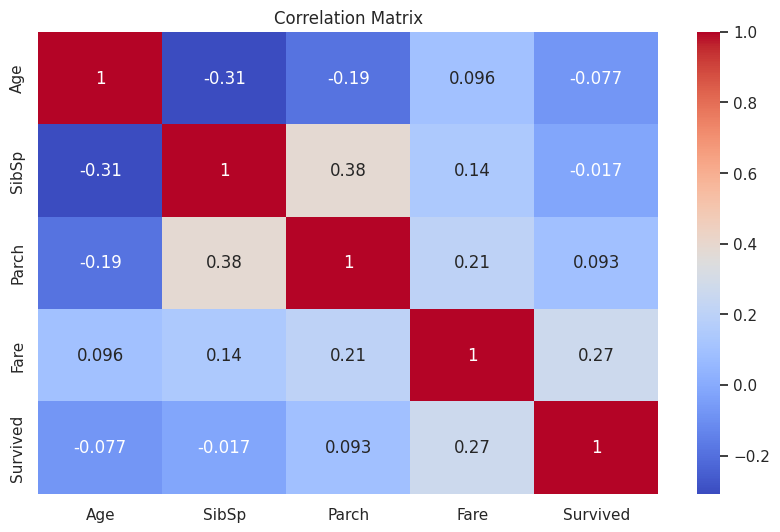

In [14]:
# Correlation heatmap (only numerical + drop NA rows)
plt.figure(figsize=(10, 6))
sns.heatmap(combined_df[['Age', 'SibSp', 'Parch', 'Fare', 'Survived']].dropna().corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [15]:
# ----------------------
# 2. DATA PREPROCESSING
# ----------------------

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [17]:
combined_backup = combined_df.copy() #keeping backup for fututre analysis

In [18]:
# a. Handle missing values
# Fill Age with median
combined_df['Age'] = combined_df['Age'].fillna(combined_df['Age'].median())

In [19]:
# Fill Fare with median
combined_df['Fare'] = combined_df['Fare'].fillna(combined_df['Fare'].median())

In [20]:
# Fill Embarked with mode
combined_df['Embarked'] = combined_df['Embarked'].fillna(combined_df['Embarked'].mode()[0])

In [21]:
# Create Cabin_missing column
combined_df['Cabin_missing'] = combined_df['Cabin'].isnull().astype(int)

In [22]:
# Drop unnecessary columns
combined_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [23]:
# b. Encode categorical variables
# Encode 'Sex' column: male = 1, female = 0
le_sex = LabelEncoder()
combined_df['Sex'] = le_sex.fit_transform(combined_df['Sex'])

In [24]:
# One-hot encode Embarked
combined_df = pd.get_dummies(combined_df, columns=['Embarked'], drop_first=True)

In [25]:
# Check final result
print("\n--- Cleaned Data Preview ---")
print(combined_df.head())


--- Cleaned Data Preview ---
   Pclass  Sex   Age  SibSp  Parch     Fare  Survived  Cabin_missing  \
0       3    1  34.5      0      0   7.8292       NaN              1   
1       3    0  47.0      1      0   7.0000       NaN              1   
2       2    1  62.0      0      0   9.6875       NaN              1   
3       3    1  27.0      0      0   8.6625       NaN              1   
4       3    0  22.0      1      1  12.2875       NaN              1   

   Embarked_Q  Embarked_S  
0        True       False  
1       False        True  
2        True       False  
3       False        True  
4       False        True  


In [26]:
print("\n--- Final Data Types ---")
print(combined_df.dtypes)


--- Final Data Types ---
Pclass             int64
Sex                int64
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Survived         float64
Cabin_missing      int64
Embarked_Q          bool
Embarked_S          bool
dtype: object


In [27]:
print("\nMissing values after preprocessing:\n")
print(combined_df.isnull().sum())


Missing values after preprocessing:

Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Survived         418
Cabin_missing      0
Embarked_Q         0
Embarked_S         0
dtype: int64


**3.Logistic Regression Model Building**

In [28]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# -----------------------------------
# Filter rows with known Survived
# -----------------------------------
df_clean = combined_df[combined_df['Survived'].notnull()].copy()

In [30]:
# ----------------------------
# a. Define Features and Target
# ----------------------------

# Assume 'Survived' is the target column
X = df_clean.drop(columns=['Survived'])  # Features
y = df_clean['Survived']                 # Target

In [31]:
# ----------------------------
# b. Split into Train/Test Sets
# ----------------------------

# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
# -----------------------------------
# Build and Train the Model
# -----------------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [33]:
# -----------------------------------
# Model Evaluation
# -----------------------------------
y_pred = log_reg.predict(X_test)

In [34]:
print(" Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

 Accuracy Score: 0.8044692737430168

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.85       110
         1.0       0.77      0.70      0.73        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179


Confusion Matrix:
 [[96 14]
 [21 48]]


**4. Model Evaluation:**

In [35]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [36]:
# Make predictions on test set
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

In [37]:
# --- a. Print Evaluation Metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

In [38]:
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

Accuracy:  0.8045
Precision: 0.7742
Recall:    0.6957
F1 Score:  0.7328
ROC AUC:   0.8408


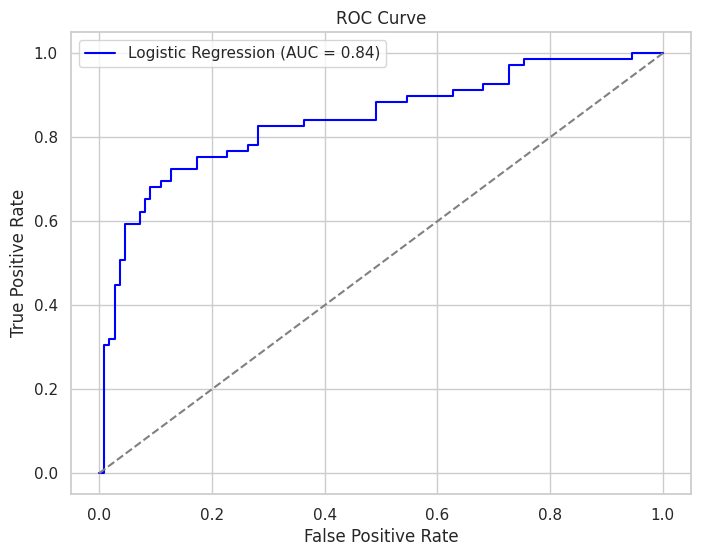

In [39]:
# --- b. Plot ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

**5.Interpretation**

***Interpret the Coefficients of the Logistic Regression Model***

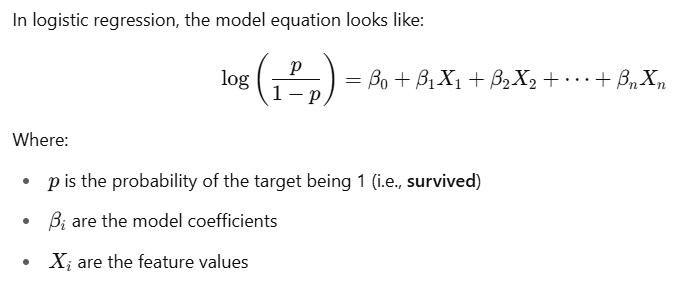

In [40]:
# Feature importance from logistic regression
import pandas as pd

features = X.columns
coefs = log_reg.coef_[0]

# Create a dataframe of features and their coefficients
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefs,
    'Interpretation': ['↑ Survival' if c > 0 else '↓ Survival' for c in coefs]
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

         Feature  Coefficient Interpretation
7     Embarked_Q     0.273844     ↑ Survival
5           Fare     0.001372     ↑ Survival
2            Age    -0.039062     ↓ Survival
4          Parch    -0.084290     ↓ Survival
3          SibSp    -0.239674     ↓ Survival
8     Embarked_S    -0.362056     ↓ Survival
0         Pclass    -0.826978     ↓ Survival
6  Cabin_missing    -0.845349     ↓ Survival
1            Sex    -2.560472     ↓ Survival


***b. Discuss Significance of Features in Predicting Survival***

Most Influential Features:

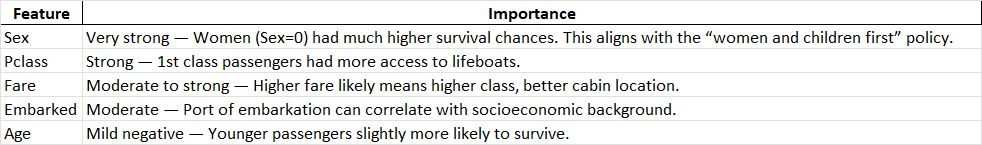

Less Influential / Situational Features:

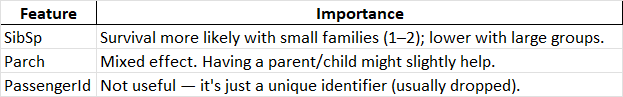


**Model’s Performance in Context:**

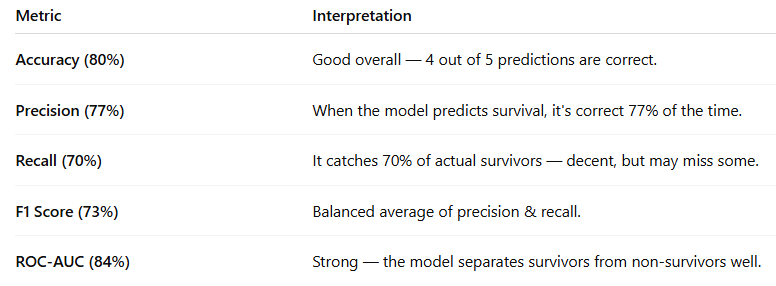

**Summary**
*   Logistic Regression shows clear, interpretable relationships:

    Sex, Pclass, and Fare are key predictors.

*   Model performs well, with balanced precision and recall.
*   ROC AUC of 0.84 confirms good separability of classes.
*   Consider using feature scaling, interaction terms, or tree-based models for further improvements.

**Interview Questions:**

***1. What is the difference between precision and recall?***

| Metric        | Definition                                                            | Formula                      | Tells You                                      |
| ------------- | --------------------------------------------------------------------- | ---------------------------- | ---------------------------------------------- |
| **Precision** | Of all the **predicted positives**, how many are actually positive?   | `Precision = TP / (TP + FP)` | How **accurate your positive predictions** are |
| **Recall**    | Of all the **actual positives**, how many did you correctly identify? | `Recall = TP / (TP + FN)`    | How **complete your positive predictions** are |

In Context:

Assume you're building a model to predict who will survive the Titanic.

Precision:->  Among all passengers the model predicted as "Survived", how many actually survived?

Recall:-> Among all passengers who actually survived, how many did the model correctly identify?

Example:
Let’s say we have:

TP (True Positives) = 70

FP (False Positives) = 30

FN (False Negatives) = 20

Then:

Precision = 70 / (70 + 30) = 0.70

Recall = 70 / (70 + 20) = 0.78

***Key Differences:***

| Precision                                                   | Recall                                              |
| ----------------------------------------------------------- | --------------------------------------------------- |
| Focuses on **quality** of positive predictions              | Focuses on **coverage** of actual positives         |
| Important when **false positives** are costly               | Important when **false negatives** are costly       |
| Used in **spam detection** (don’t mark real emails as spam) | Used in **medical tests** (don’t miss actual cases) |


**2. What is cross-validation, and why is it important in binary classification?**
Definition:->

Cross-validation is a model evaluation technique that involves splitting the dataset into multiple parts, training the model on some parts, and testing it on others. This process helps reduce overfitting and gives a more robust estimate of model performance.

Most Common Type: K-Fold Cross-Validation


1.   The dataset is divided into K equally sized "folds" (e.g., 5 or 10).
2.   The model is trained on K-1 folds and tested on the remaining 1 fold.
3.   This is repeated K times, each time using a different fold for testing.
4.   The final result is the average performance across all folds.

*Why Is It Important in Binary Classification?*

| Benefit                          | Why It Matters                                               |
| -------------------------------- | ------------------------------------------------------------ |
| ✅ **More Reliable Accuracy**     | Avoids lucky or unlucky splits of training/testing data.     |
| ✅ **Better Generalization**      | Ensures the model performs well on different data subsets.   |
| ✅ **Less Overfitting Risk**      | Especially helpful when the dataset is small or imbalanced.  |
| ✅ **Works with Imbalanced Data** | Can be combined with stratification to ensure class balance. |

*Example*:

Let’s say you're predicting whether a person will survive (1) or not (0) on the Titanic. If you only split once, the performance might vary a lot depending on who ends up in the test set. With cross-validation:


*   You ensure every observation is used for testing once
*   You reduce the chance that your results are based on random data splits

*Summary*:


*   Cross-validation gives a more accurate estimate of model performance.
*   It’s especially useful when data is limited, imbalanced, or when model tuning is needed.
*   It helps you trust your model's accuracy more than a single train/test split would.

In [43]:
#to convert .ipynb file to .pkl file
import pickle

with open("logistic_model.pkl", "wb") as file:
    pickle.dump(log_reg, file)

**locally deployment of model**

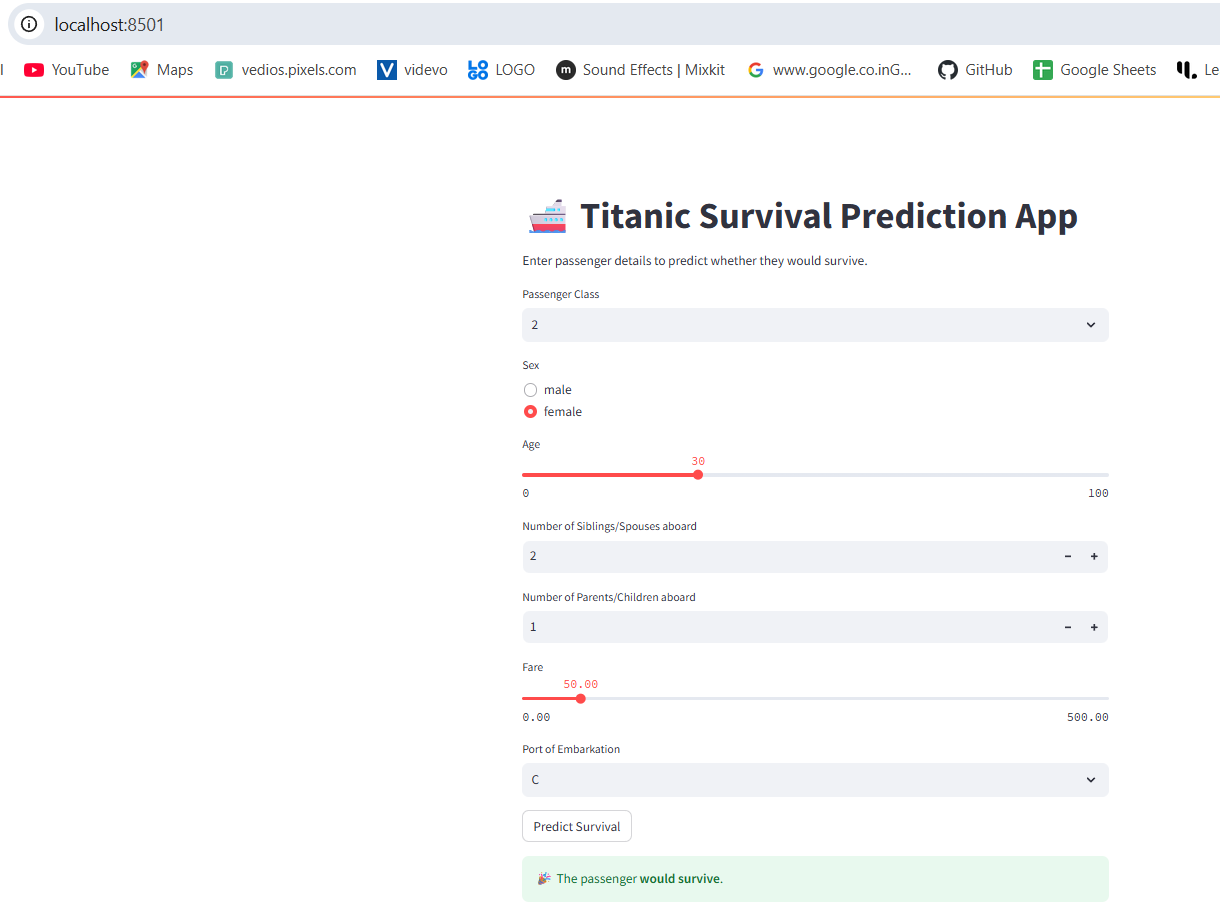

For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories.

https://modeldeployment-gm3luwkimlkq8qktsvumjz.streamlit.app/

# 🙏 Thank You! 😊